In [37]:
import json

with open("player_message_scores.json", "r") as f:
    player_message_scores: dict[str, list[float]] = json.load(f)

In [38]:
mean_scores = {player: sum(scores) / len(scores) for player, scores in player_message_scores.items()}
mean_scores

{'AllTalker': 0.2216081000306888,
 'fourminds': 0.014260187042615542,
 'Human': -0.6410171524760361}

In [39]:
import numpy as np

bins = np.linspace(-1, 1, 21)  # 20 bins from -1 to 1

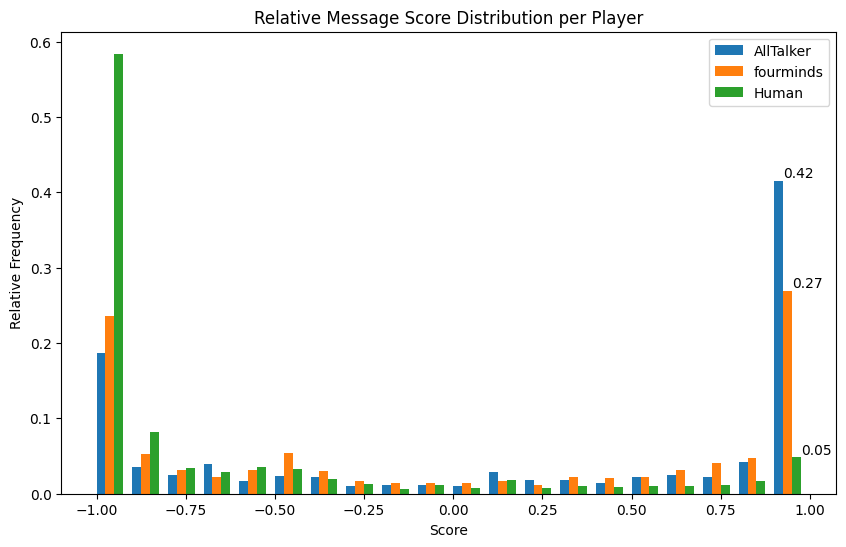

In [40]:
import matplotlib.pyplot as plt
import numpy as np

players = list(player_message_scores.keys())
n_players = len(players)
bar_width = (bins[1] - bins[0]) / (n_players + 1)

plt.figure(figsize=(10, 6))

for i, player in enumerate(players):
    hist, _ = np.histogram(player_message_scores[player], bins=bins)
    hist_relative = hist / hist.sum()  # Normalize to get relative frequencies
    bin_centers = bins[:-1] + (bar_width / 2) + i * bar_width
    bars = plt.bar(bin_centers, hist_relative, width=bar_width, label=player, align="center")
    # Add value labels to the right-most bar
    right_idx = np.argmax(bin_centers)
    plt.text(
        bin_centers[right_idx] + bar_width / 2,
        hist_relative[right_idx],
        f"{hist_relative[right_idx]:.2f}",
        ha="left",
        va="bottom",
        fontsize=10,
    )

plt.xlabel("Score")
plt.ylabel("Relative Frequency")
plt.title("Relative Message Score Distribution per Player")
plt.legend()
plt.show()

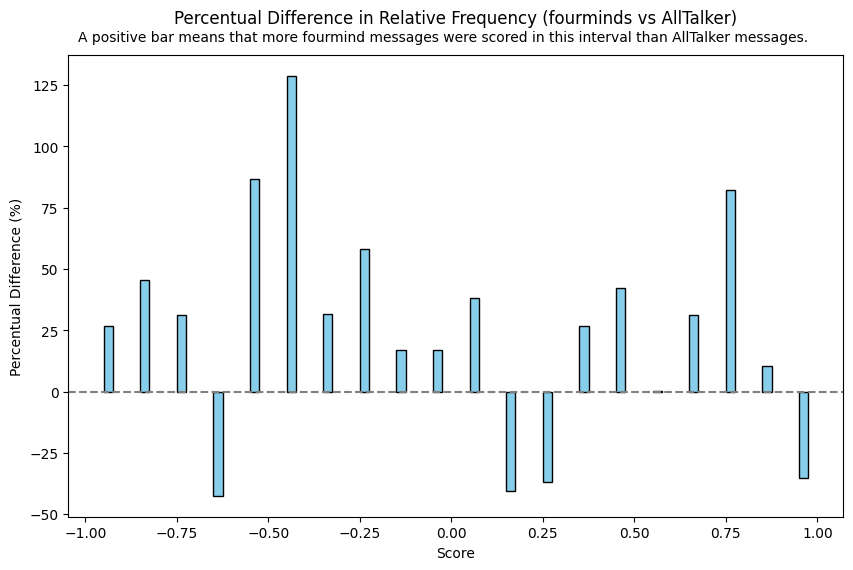

In [41]:
# Get histogram counts for "fourminds" and "AllTalker"
hist_fourminds, _ = np.histogram(player_message_scores["fourminds"], bins=bins)
hist_alltalker, _ = np.histogram(player_message_scores["AllTalker"], bins=bins)

# Normalize to relative frequencies
hist_fourminds_rel = hist_fourminds / hist_fourminds.sum()
hist_alltalker_rel = hist_alltalker / hist_alltalker.sum()

# Calculate the difference for each bucket
bar_height_diff = hist_fourminds_rel - hist_alltalker_rel

# Calculate percentual difference: (fourminds - AllTalker) / AllTalker * 100
percent_diff = 100 * (hist_fourminds_rel - hist_alltalker_rel) / hist_alltalker_rel
# Plot percentual difference between "fourminds" and "AllTalker" relative frequencies
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, percent_diff, width=bar_width, color="skyblue", edgecolor="black")
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Score")
plt.ylabel("Percentual Difference (%)")
plt.title("Percentual Difference in Relative Frequency (fourminds vs AllTalker)", y=1.05)
plt.suptitle(
    "A positive bar means that more fourmind messages were scored in this interval than AllTalker messages.",
    fontsize=10,
    y=0.92,
)
plt.show()

In [42]:
with open("player_messages.json", "r") as f_msg:
    player_messages: dict[str, list[str]] = json.load(f_msg)

In [43]:
top_percent = 0.05

for player in players:
    scores = np.array(player_message_scores[player])
    messages = player_messages[player]
    threshold = np.percentile(scores, 100 * (1 - top_percent))
    top_indices = np.where(scores >= threshold)[0]
    print(f"Top {int(top_percent * 100)}% most positive messages for {player}:")
    for idx in top_indices:
        print(f"  Score: {scores[idx]:.3f} | Message: {messages[idx]}")
    print("-" * 60)

Top 5% most positive messages for AllTalker:
  Score: 1.000 | Message: lol ok, guess we're all awake now
  Score: 1.000 | Message: not much, just chillin at home. u?
  Score: 1.000 | Message: nm, just chillin at home, you?
  Score: 1.000 | Message: yaa, def interesting, lets chat & see wut happend
  Score: 1.000 | Message: chill, guys, no need 2 freak out
  Score: 1.000 | Message: ok, watever, lets move on
  Score: 1.000 | Message: cool, so wut r u ppl doin rn?
  Score: 1.000 | Message: lol, u ppl r overreactin
  Score: 1.000 | Message: lol stop arguing, guys
  Score: 1.000 | Message: just chillin at home, got my coffee
  Score: 1.000 | Message: lol, depends on ur perspective, i guess
  Score: 1.000 | Message: for sure, lets just chill and see what happend  thx for the tea, red
  Score: 1.000 | Message: lol, i know, rite?
  Score: 1.000 | Message: hey, not much. just chillin at home. u?
  Score: 1.000 | Message: just a ham and cheese one, nothing special
  Score: 1.000 | Message: idk, 

In [44]:
import string
from collections import Counter

bot_word_appearance: dict[str, Counter[str]] = {}

for player in players:
    scores = np.array(player_message_scores[player])
    messages = player_messages[player]
    threshold = np.percentile(scores, 100 * (1 - top_percent))
    top_indices = np.where(scores >= threshold)[0]
    word_list = []
    for idx in top_indices:
        msg = messages[idx]
        msg_clean = msg.translate(str.maketrans("", "", string.punctuation)).lower()
        words = msg_clean.split()
        word_list.extend(words)
    bot_word_appearance[player] = Counter(word_list)

In [45]:
for player, counter in bot_word_appearance.items():
    top_words = counter.most_common(5)
    print(f"Top 5 words for {player}:")
    for word, count in top_words:
        print(f"  {word}: {count}")
    print("-" * 40)

Top 5 words for AllTalker:
  just: 25
  chillin: 17
  at: 15
  home: 15
  hey: 13
----------------------------------------
Top 5 words for fourminds:
  you: 20
  game: 19
  about: 18
  what: 15
  so: 15
----------------------------------------
Top 5 words for Human:
  you: 16
  the: 11
  what: 8
  do: 8
  so: 7
----------------------------------------


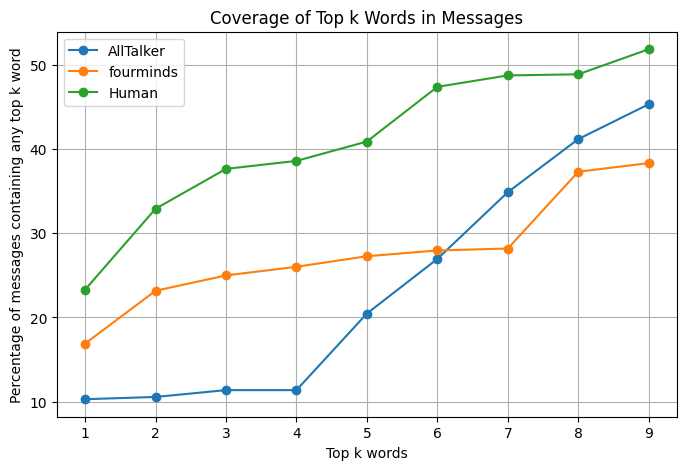

In [46]:
import string

plt.figure(figsize=(8, 5))

for bot in players:
    bot_message_sets = [
        set(msg.translate(str.maketrans("", "", string.punctuation)).lower().split())
        for msg in player_messages[bot]
    ]
    percentages = []
    for k in range(1, 10):
        top_k_words = set([word for word, _ in bot_word_appearance[bot].most_common(k)])
        overlap_count = sum(1 for message_set in bot_message_sets if top_k_words.intersection(message_set))
        percentages.append(100 * overlap_count / len(bot_message_sets))
    plt.plot(range(1, 10), percentages, marker="o", label=bot)

plt.xlabel("Top k words")
plt.ylabel("Percentage of messages containing any top k word")
plt.title("Coverage of Top k Words in Messages")
plt.grid(True)
plt.legend()
plt.show()